<a href="https://colab.research.google.com/github/tongthai2542/flook10-07/blob/master/image_processing101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving apple-256261_640.jpg to apple-256261_640.jpg


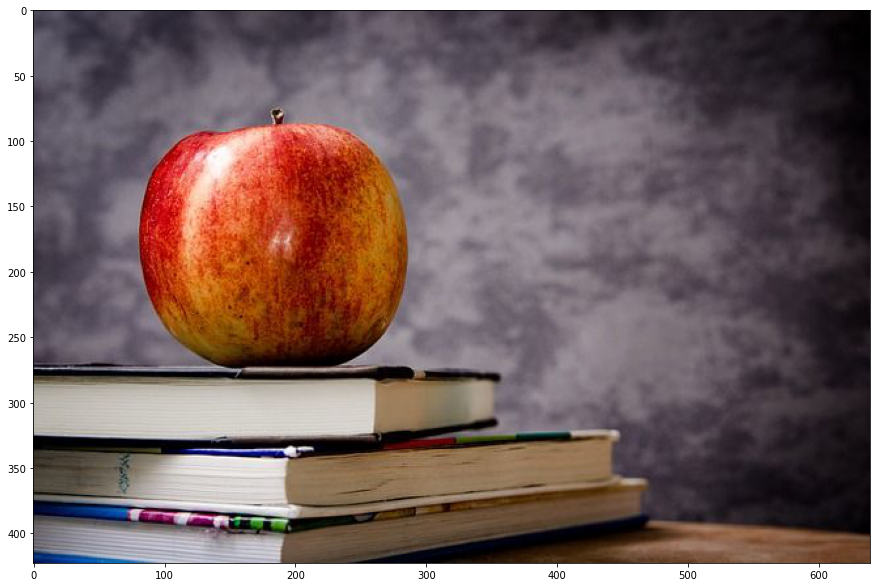

In [ ]:
# Now let’s load an image and observe its various properties in general.
import imageio
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()
filename = uploaded.keys()
for file in filename:
    data = uploaded[file]

pic = imageio.imread(data)
plt.figure(figsize = (15,15))
plt.imshow(pic)

In [ ]:
# Observe Basic Properties of Image
print('Type of the image : ' , type(pic)) 
print('Shape of the image : {}'.format(pic.shape)) 
print('Image Hight {}'.format(pic.shape[0])) 
print('Image Width {}'.format(pic.shape[1])) 
print('Dimension of Image {}'.format(pic.ndim))

Type of the image :  <class 'imageio.core.util.Array'>
Shape of the image : (423, 640, 3)
Image Hight 423
Image Width 640
Dimension of Image 3


In [ ]:
print('Image size {}'.format(pic.size)) 
print('Maximum RGB value in this image {}'.format(pic.max())) 
print('Minimum RGB value in this image {}'.format(pic.min()))

Image size 812160
Maximum RGB value in this image 255
Minimum RGB value in this image 0


In [ ]:
# A specific pixel located at Row : 100 ; Column : 50  
# Each channel's value of it, gradually R , G , B  
print('Value of only R channel {}'.format(pic[ 100, 50, 0])) 
print('Value of only G channel {}'.format(pic[ 100, 50, 1])) 
print('Value of only B channel {}'.format(pic[ 100, 50, 2]))

Value of only R channel 106
Value of only G channel 100
Value of only B channel 114


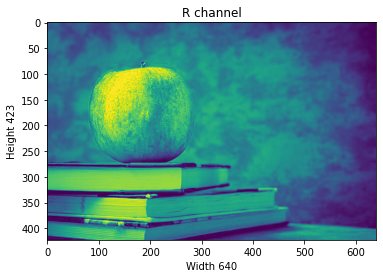

In [ ]:
plt.title('R channel') 
plt.ylabel('Height {}'.format(pic.shape[0])) 
plt.xlabel('Width {}'.format(pic.shape[1])) 
plt.imshow(pic[ : , : , 0])
plt.show()

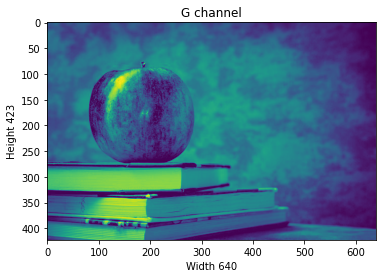

In [ ]:
plt.title('G channel')
plt.ylabel('Height {}'.format(pic.shape[0])) 
plt.xlabel('Width {}'.format(pic.shape[1])) 
plt.imshow(pic[ : , : , 1]) 
plt.show()

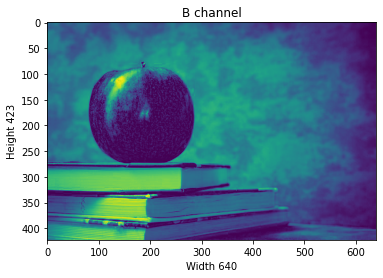

In [ ]:
plt.title('B channel') 
plt.ylabel('Height {}'.format(pic.shape[0])) 
plt.xlabel('Width {}'.format(pic.shape[1])) 
plt.imshow(pic[ : , : , 2]) 
plt.show()

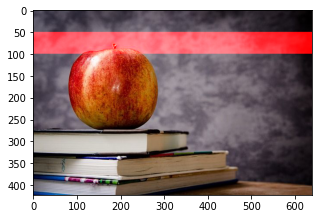

In [ ]:
pic[50:100 , : , 0] = 255 # full intensity to those pixel's R channel 
plt.figure( figsize = (5,5)) 
plt.imshow(pic) 
plt.show()

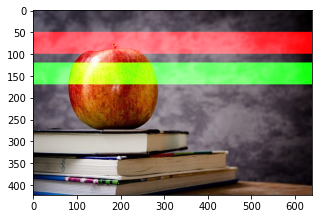

In [ ]:
pic[120:170 , : , 1] = 255 # full intensity to those pixel's G channel 
plt.figure( figsize = (5,5)) 
plt.imshow(pic) 
plt.show()

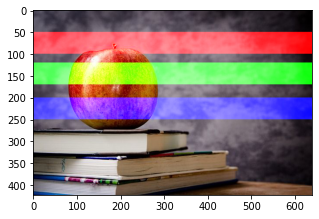

In [ ]:
pic[200:250 , : , 2] = 255 # full intensity to those pixel's B channel 
plt.figure( figsize = (5,5)) 
plt.imshow(pic) 
plt.show()

# Splitting Layers

Saving 1_B3FDYMdCX5SQaqrOl-SfYQ.jpeg to 1_B3FDYMdCX5SQaqrOl-SfYQ.jpeg


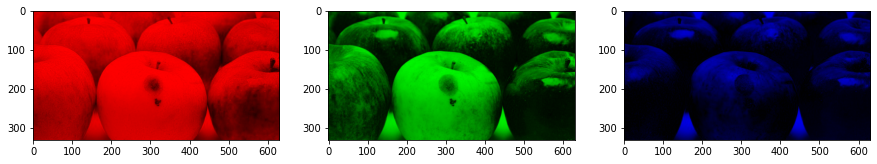

In [ ]:
import numpy as np 
from google.colab import files
uploaded = files.upload()
filename = uploaded.keys()
for file in filename:
    data = uploaded[file]

pic = imageio.imread(data)
 
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(15,5))  
for c, ax in zip(range(3), ax):     
     # create zero matrix        
     split_img = np.zeros(pic.shape, dtype="uint8") 
     # 'dtype' by default: 'numpy.float64'  # assing each channel      
     split_img[ :, :, c] = pic[ :, :, c] # display each channel     
     ax.imshow(split_img)

# Greyscale
- Binary: Pixel is either black or white:0 or 255
- Greyscale: Ranges of shades of grey:0 ~ 255

Y' = 0.299 R + 0.587 G + 0.114 B

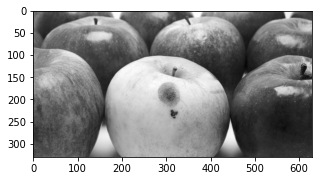

In [ ]:
gray = lambda rgb : np.dot(rgb[... , :3] , [0.299 , 0.587, 0.114])   
gray = gray(pic) 
plt.figure( figsize = (5,5))  
plt.imshow(gray, cmap = plt.get_cmap(name = 'gray')) 
plt.show()

# Use Logical Operator To Process Pixel Values


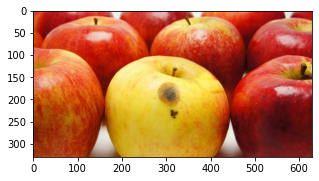

In [ ]:
plt.figure(figsize=(5,5)) 
plt.imshow(pic) 
plt.show()

In [ ]:
low_pixel = pic < 20  
# to ensure of it let's check if all values in low_pixel are True or not 
if low_pixel.any() == True:     
    print(low_pixel.shape)

(330, 630, 3)


In [ ]:
print(pic.shape)
print(low_pixel.shape)

(330, 630, 3)
(330, 630, 3)


Saving 1_B3FDYMdCX5SQaqrOl-SfYQ.jpeg to 1_B3FDYMdCX5SQaqrOl-SfYQ (1).jpeg


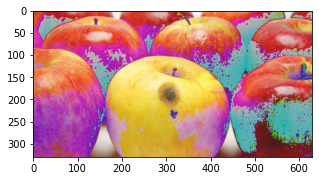

In [ ]:
# randomly choose a value 
import random

# load image
from google.colab import files
uploaded = files.upload()
filename = uploaded.keys()
for file in filename:
    data = uploaded[file]

pic = imageio.imread(data)

# set value randomly range from 25 to 225 - these value also randomly choosen
pic[low_pixel] = random.randint(25,225)
# display the image
plt.figure( figsize = (5,5))
plt.imshow(pic)
plt.show()

# Masking

Saving 1_B3FDYMdCX5SQaqrOl-SfYQ.jpeg to 1_B3FDYMdCX5SQaqrOl-SfYQ (2).jpeg


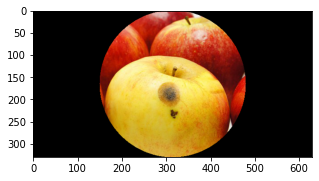

In [ ]:
from google.colab import files
uploaded = files.upload()
filename = uploaded.keys()
for file in filename:
    data = uploaded[file]

pic = imageio.imread(data)

# seperate the row and column values  
total_row , total_col , layers = pic.shape  
'''     Create vector.     Ogrid is a compact method of creating a multidimensional     ndarray operations in single lines.     
for ex:     
>>> ogrid[0:5,0:5]     
output: [array([[0],
                [1],
                [2],
                [3],
                [4]]),
         array([[0, 1, 2, 3, 4]])]  
''' 
x , y = np.ogrid[:total_row , :total_col]  
# get the center values of the image 
cen_x , cen_y = total_row/2 , total_col/2  
'''    
 Measure distance value from center to each border pixel.     To make it easy, we can think it's like, we draw a line from center-     to each edge pixel value --> s**2 = (Y-y)**2 + (X-x)**2  
''' 
distance_from_the_center = np.sqrt((x-cen_x)**2 + (y-cen_y)**2)  
# Select convenient radius value 
radius = (total_row/2)  
# Using logical operator '>'  
''' 
logical operator to do this task which will return as a value  of True for all the index according to the given condition 
''' 
circular_pic = distance_from_the_center > radius  
''' 
let assign value zero for all pixel value that outside the cirular disc. All the pixel value outside the circular disc, will be black now. 
''' 
pic[circular_pic] = 0 
plt.figure(figsize = (5,5)) 
plt.imshow(pic)  
plt.show()

Saving 1_B3FDYMdCX5SQaqrOl-SfYQ.jpeg to 1_B3FDYMdCX5SQaqrOl-SfYQ (3).jpeg


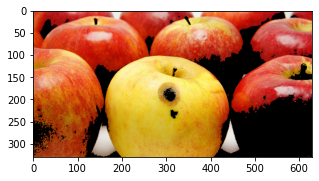

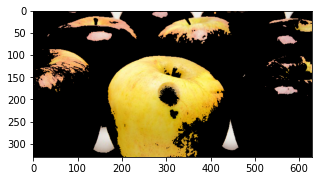

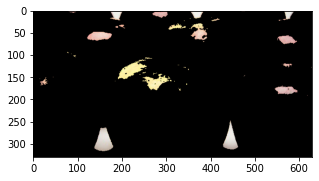

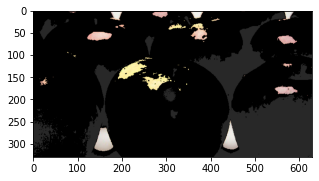

In [ ]:
# Only Red Pixel value , higher than 150
from google.colab import files
uploaded = files.upload()
filename = uploaded.keys()
for file in filename:
    data = uploaded[file]

pic = imageio.imread(data)

red_mask = pic[:, :, 0] < 150
pic[red_mask] = 0
plt.figure(figsize=(5,5))
plt.imshow(pic)

# Only Green Pixel value , higher than 150
green_mask = pic[:, :, 1] < 150
pic[green_mask] = 0
plt.figure(figsize=(5,5))
plt.imshow(pic)

# Only Blue Pixel value , higher than 150
blue_mask = pic[:, :, 2] < 150
pic[blue_mask] = 0
plt.figure(figsize=(5,5))
plt.imshow(pic)

# Composite mask using logical_and
final_mask = np.logical_and(red_mask, green_mask, blue_mask)
pic[final_mask] = 40
plt.figure(figsize=(5,5))
plt.imshow(pic)

# Negative Image


(array([1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+01, 6.000e+00,
        7.000e+00, 1.100e+01, 1.400e+01, 2.000e+01, 1.700e+01, 3.000e+01,
        4.100e+01, 3.100e+01, 4.500e+01, 6.800e+01, 1.040e+02, 1.050e+02,
        1.140e+02, 1.630e+02, 2.100e+02, 2.840e+02, 3.070e+02, 4.770e+02,
        4.740e+02, 6.250e+02, 7.180e+02, 7.870e+02, 9.310e+02, 1.068e+03,
        1.030e+03, 1.193e+03, 1.215e+03, 1.391e+03, 1.454e+03, 1.322e+03,
        1.185e+03, 1.283e+03, 1.278e+03, 1.186e+03, 1.260e+03, 1.275e+03,
        1.233e+03, 1.242e+03, 1.241e+03, 1.266e+03, 1.235e+03, 1.166e+03,
        1.286e+03, 1.254e+03, 1.159e+03, 1.232e+03, 1.226e+03, 1.219e+03,
        1.103e+03, 1.187e+03, 1.176e+03, 1.226e+03, 1.137e+03, 1.162e+03,
        1.129e+03, 1.188e+03, 1.131e+03, 1.084e+03, 1.102e+03, 1.044e+03,
        1.018e+03, 1.039e+03, 1.129e+03, 1.115e+03, 1.146e+03, 1.172e+03,
        1.205e+03, 1.153e+03, 1.164e+03, 1.057e+03, 1.056e+03, 1.097e+03,
        1.092e+03, 1.084e+03, 1.130e+0

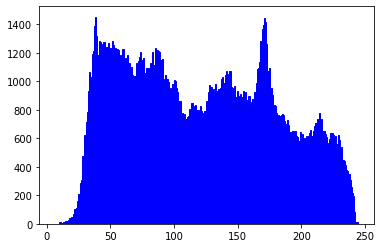

In [ ]:
plt.hist(gray.ravel(), bins=256, fc='b', ec='b')

(-0.5, 629.5, 329.5, -0.5)

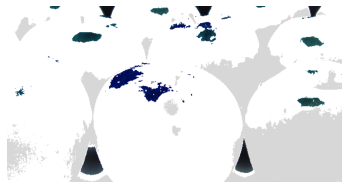

In [ ]:
negative = 255 - pic
#negative = 255 - gray
plt.figure(figsize = (6,6))
plt.imshow(negative)
plt.axis("off")

(-0.5, 629.5, 329.5, -0.5)

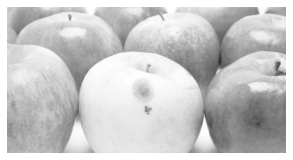

In [ ]:
# Log Transformation
import numpy as np
'''
log transform
-&gt; s=c*log(1+r)

So, we calculate constant c to estimate s 
-&gt; c = (L-1)/log(1+|I_max|)
'''
max = np.max(gray)
def log_transform():
  return (255/np.log(1+max)) * np.log(1+gray)

plt.figure(figsize = (5,5))
plt.imshow(log_transform(), cmap=plt.get_cmap(name='gray'))
plt.axis('off')

(-0.5, 629.5, 329.5, -0.5)

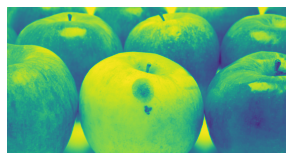

In [ ]:
# Gamma Correction / Coding
gamma = 2.2 # Gamma &lt; 1 -- Dark ; Gamma &gt; 1 -- Bright

#gamma_correction = ((pic/255) ** (1/gamma))
gamma_correction = ((gray/255) ** (1/gamma))
plt.figure(figsize = (5,5))
plt.imshow(gamma_correction)
plt.axis('off')

Saving 1_B3FDYMdCX5SQaqrOl-SfYQ.jpeg to 1_B3FDYMdCX5SQaqrOl-SfYQ (4).jpeg
CPU times: user 9.69 s, sys: 47.4 ms, total: 9.74 s
Wall time: 17.1 s


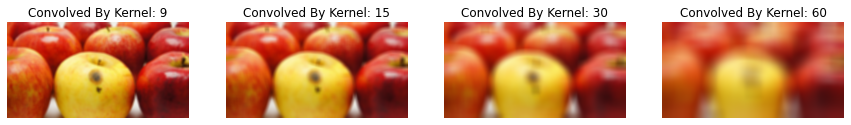

In [ ]:
# Convolution
%%time
import numpy as np
import imageio
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

def Convolution(image, kernel):
  conv_bucket = []
  for d in range(image.ndim):
    conv_channel = convolve2d(image[:,:,d], kernel, mode="same", boundary="symm")
    conv_bucket.append(conv_channel)
  return np.stack(conv_bucket, axis=2).astype("uint8")

kernel_size = [9,15,30,60]
fig, axs = plt.subplots(nrows=1, ncols=len(kernel_size), figsize=(15,15));

uploaded = files.upload()
filename = uploaded.keys()
for file in filename:
    data = uploaded[file]

pic = imageio.imread(data)

for k, ax in zip(kernel_size, axs):
  kernel = np.ones((k,k))
  kernel /= np.sum(kernel)
  ax.imshow(Convolution(pic, kernel));
  ax.set_title("Convolved By Kernel: {}".format(k));
  ax.set_axis_off();

CPU times: user 76.2 ms, sys: 6.78 ms, total: 83 ms
Wall time: 139 ms


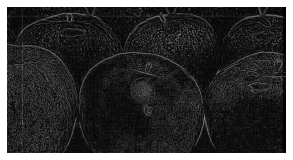

In [ ]:
# Edge detection
%%time
from skimage import color
from skimage import exposure
import numpy as np

# Convert the image to grayscale
img = color.rgb2gray(pic)

# outline kernel - used for edge detection
kernel = np.array([[-1,-1,-1],
                   [-1,8,-1],
                   [-1,-1,-1]])

# we use 'valid' which means we do not add zero padding to our image
edges = convolve2d(img, kernel, mode='valid')

# Adjust the contrast of the filtered image by applying Histogram Equalization
edge_equalized = exposure.equalize_adapthist(edges/np.max(np.abs(edges)),
                                             clip_limit=0.03)

# plot the edges_clipped
plt.figure(figsize=(5,5))
plt.imshow(edge_equalized, cmap='gray')
plt.axis('off')

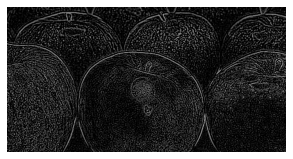

CPU times: user 145 ms, sys: 9.92 ms, total: 155 ms
Wall time: 156 ms


In [ ]:
# Sharpen Kernel
%%time

from skimage import color
from skimage import exposure
from scipy.signal import convolve2d
import numpy as np
import matplotlib.pyplot as plt

# apply_sharpen filter to the original image
sharpen_kernel = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])
image_sharpen = convolve2d(img, sharpen_kernel, mode='valid')

# apply edge kernel to the output of the sharpen kernel
edge_kernel = np.array([[-1,-1,-1],
                        [-1,8,-1],
                        [-1,-1,-1]])
edges = convolve2d(image_sharpen, edge_kernel, mode='valid')

# apply normalize box blur filter to the edge detection filtered image
blur_kernel = np.array([[1,1,1],
                        [1,1,1],
                        [1,1,1]])/9.0;

denoised = convolve2d(edges, blur_kernel, mode = 'valid')

# Adjust the contrast of the filtered image by applying Histogram Equalization
denoised_equalized = exposure.equalize_adapthist(denoised/np.max(np.abs(denoised)),
                                                 clip_limit=0.03)

plt.figure(figsize=(5,5))
plt.imshow(denoised_equalized, cmap='gray')
plt.axis('off')
plt.show()

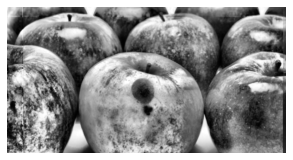

CPU times: user 138 ms, sys: 6.87 ms, total: 144 ms
Wall time: 146 ms


In [ ]:
# Gaussian Window
%%time

from skimage import color
from skimage import exposure
from scipy.signal import convolve2d
import numpy as np
import matplotlib.pyplot as plt

# gaussian kernel - used for blurring
kernel = np.array([[1,2,1],
                   [2,4,2],
                   [1,2,1]])
kernel = kernel/np.sum(kernel)
# we use 'valid' which means we do not add zero padding to our image
edges = convolve2d(img, kernel, mode='valid')

# Adjust the contrast of the filtered image by applying Histogram Equalization
edges_equalized = exposure.equalize_adapthist(edges/np.max(np.abs(edges)),
                                              clip_limit=0.03)

# plot the edges_clipped
plt.figure(figsize=(5,5))
plt.imshow(edges_equalized, cmap='gray')
plt.axis('off')
plt.show()

CPU times: user 93.2 ms, sys: 7.94 ms, total: 101 ms
Wall time: 104 ms


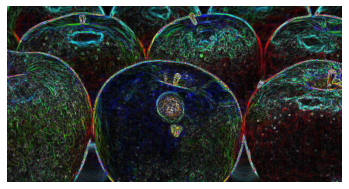

In [ ]:
# Sobel Kernels
%%time

from skimage import color
from skimage import exposure
from scipy.signal import convolve2d
import numpy as np
import matplotlib.pyplot as plt

# horizontal sobel
sobel_x = np.c_[[-1,0,1],
                [-2,0,2],
                [-1,0,1]]

# vertical sobel
sobel_y = np.c_[[1,2,1],
                [0,0,0],
                [-1,-2,-1]]
ims = []
for i in range(3):
  sx = convolve2d(pic[:,:,i], sobel_x, mode='same', boundary='symm')
  sy = convolve2d(pic[:,:,i], sobel_y, mode='same', boundary='symm')
  ims.append(np.sqrt(sx*sx + sy*sy))

img_conv = np.stack(ims, axis=2).astype("uint8")

# plot the img_conv
plt.figure(figsize=(6,5))
plt.imshow(img_conv)
plt.axis('off')

CPU times: user 129 ms, sys: 3.02 ms, total: 132 ms
Wall time: 135 ms


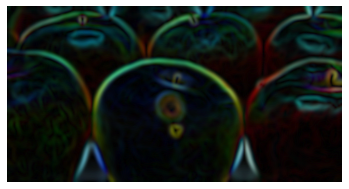

In [ ]:
%%time

from scipy.signal import convolve2d
from scipy.ndimage import (median_filter, gaussian_filter)
import numpy as np
import imageio
import matplotlib.pyplot as plt

# Gaussian filter
def gaussian_filter_(img):
  '''
  Applies a median filter to all channels
  '''
  ims = []
  for d in range(3):
    img_conv_d = gaussian_filter(img[:,:,d], sigma = 4)
    ims.append(img_conv_d)
  return np.stack(ims, axis=2).astype("uint8")

filtered_img = gaussian_filter_(pic)

# vertical sobel
sobel_x = np.c_[[-1,0,1],
                [-2,0,2],
                [-1,0,1]]

# vertical sobel
sobel_y = np.c_[[1,2,1],
                [0,0,0],
                [-1,-2,-1]]

ims = []
for i in range(3):
  sx = convolve2d(filtered_img[:,:,i], sobel_x, mode='same', boundary='symm')
  sy = convolve2d(filtered_img[:,:,i], sobel_y, mode='same', boundary='symm')
  ims.append(np.sqrt(sx*sx + sy*sy))

img_conv = np.stack(ims, axis=2).astype("uint8")

# plot the img_conv
plt.figure(figsize=(6,5))
plt.imshow(img_conv)
plt.axis('off')

In [ ]:
print('Shape of the image : {}'.format(filtered_img.shape)) 
print('Image size {}'.format(filtered_img.size)) 
print('Maximum RGB value in this image {}'.format(filtered_img.max())) 
print('Minimum RGB value in this image {}'.format(filtered_img.min()))

Shape of the image : (330, 630, 3)
Image size 623700
Maximum RGB value in this image 253
Minimum RGB value in this image 1


In [ ]:
# median filter
%%time

from scipy.signal import convolve2d
from scipy.ndimage import (median_filter, gaussian_filter)
import numpy as np
import imageio
import matplotlib.pyplot as plt

def median_filter_(img, mask):
  '''
  Applies a median filter to all channels
  '''
  ims = []
  for d in range(3):
    img_conv_d = median_filter(img[:,:,d], size=(mask,mask))
    ims.append(img_conv_d)
  return np.stack(ims, axis=2).astype("uint8")

filtered_img = median_filter_(pic, 50) # change parameter kernel size

CPU times: user 18.6 s, sys: 7.85 ms, total: 18.7 s
Wall time: 18.7 s


In [ ]:
print('Shape of the image : {}'.format(filtered_img.shape)) 
print('Image size {}'.format(filtered_img.size)) 
print('Maximum RGB value in this image {}'.format(filtered_img.max())) 
print('Minimum RGB value in this image {}'.format(filtered_img.min()))

Shape of the image : (330, 630, 3)
Image size 623700
Maximum RGB value in this image 253
Minimum RGB value in this image 3


(-0.5, 629.5, 329.5, -0.5)

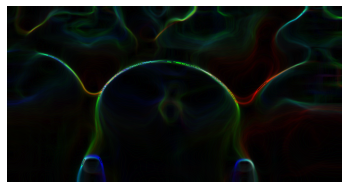

In [ ]:
# vertical sobel
sobel_x = np.c_[[-1,0,1],
                [-2,0,2],
                [-1,0,1]]

# vertical sobel
sobel_y = np.c_[[1,2,1],
                [0,0,0],
                [-1,-2,-1]]

ims = []
for i in range(3):
  sx = convolve2d(filtered_img[:,:,i], sobel_x, mode='same', boundary='symm')
  sy = convolve2d(filtered_img[:,:,i], sobel_y, mode='same', boundary='symm')
  ims.append(np.sqrt(sx*sx + sy*sy))

img_conv = np.stack(ims, axis=2).astype("uint8")

# plot the img_conv
plt.figure(figsize=(6,5))
plt.imshow(img_conv)
plt.axis('off')

# Thresholding
Ostu’s Method

(-0.5, 629.5, 329.5, -0.5)

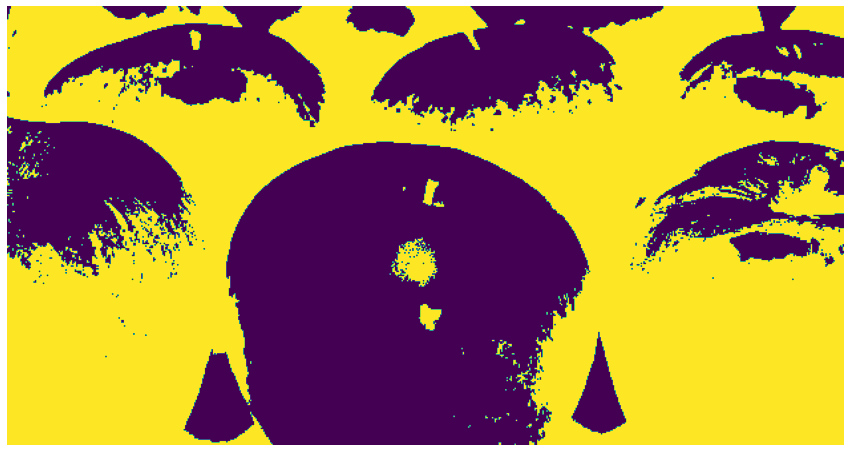

In [ ]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

def otsu_threshold(im):
  # compute histogram and probabilistics of each intensity level
  pixel_counts = [np.sum(im==1) for i in range(256)]

  # Initialization
  s_max = (0,0)

  for threshold in range(256):
    #update
    w_0 = sum(pixel_counts[:threshold])
    w_1 = sum(pixel_counts[threshold:])

    mu_0 = sum([i*pixel_counts[i] for i in range(0,threshold)]) / w_0 if w_0 > 0 else 0
    mu_1 = sum([i*pixel_counts[i] for i in range(threshold,256)]) / w_1 if w_1 > 0 else 0

    # calculate - inter class variance
    s = w_0 * w_1 * (mu_0 - mu_1) ** 2

    if s > s_max[1]:
      s_max = (threshold, s)
    
  return s_max[0]

gray = lambda rgb : np.dot(rgb[... , :3] , [0.299 , 0.587, 0.114])   
gray = gray(pic)

thresh = otsu_threshold(pic)
seg_results = gray < thresh

# plot the img_conv
plt.figure(figsize=(15,15))
plt.imshow(seg_results)
plt.axis('off')

In [ ]:
# K-Means Clustering Segmentation
%%time
from sklearn import cluster
import matplotlib.pyplot as plt

# fit on the image with cluster five
kmeans_cluster = cluster.KMeans(n_clusters=5) # assign number of clusters
kmeans_cluster.fit(gray)

cluster_centers = kmeans_cluster.cluster_centers_
cluster_labels = kmeans_cluster.labels_

CPU times: user 382 ms, sys: 209 ms, total: 591 ms
Wall time: 751 ms


In [ ]:
#cluster_centers
cluster_labels

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,